# Alchemy Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Despite few users and fluctuating revenue, in sum total revenue for Alchemy is significant at 62899.3880 dollars. It is profitable, with total net profit at 25031.7902 dollars. This put Alchemy's profit margin at around 40 %.
>*  With few users coming in and out with purchases, revenue growth fluctuates significantly. Some month there is absolutely no purchase at all, which meant -100% in growth (February and June), while other times sales is the exact same amount as the initial puchase which meant 0% growth (March). Other times, there are sales but growth is negative (August and September). On average, CMGR is around 1%..
>* On average, Alchemy have around 10 users each month, with 2 being active. There is a 99% likelihood of users churning in the next month (almost a certainty).
>
>Monthly Cohort Analysis
>* For all cohorts there is no activity beyond their initial purchase.  February and June cohort is missing/have no purchase at all. User retention rates is 0%, NDR is 0%, for all cohorts.
>* March cohort, which had 5 users in the initial month, contributes the highest in initial revenue, at 17455.89.
>* No negative profit values can be observed for Alchemy.
>
>Profitability
>* Pre-discounts, Alchemy consistently had positive profits, without any negative profits. However, purchases are made by cohorts only in the initial month (no subsequent purchases), and that there is no purchase at all in February and June. Profits tend to spike in certain months, with no apparent seasonality. To see meaningful pattern in might be necessary to do an annual analysis along with monthly analysis.
>* March, October, and November stand out with higher profits. March has the highest user (5) and highest positive profit (8,609.9441), which indicate that user engagement is a crucial driver of profits. October shows a high positive profit (6,159.9824) despite having only 1 active user. November records a notable positive profit (5,978.9685) with 3 active users.
>
>Discounting EDA
>* Majority of Alchemy orders are discounted, with 68% being discounted orders, primarily at 20% discount. This suggests that discounts play a critical role in driving sales. Customers might be highly responsive to discounts, indicating a price-sensitive user base. However, we also know that retention is mostly non-existant for Alchemy. Failure to retain customers suggests that the perceived value of the product at a discounted price is higher than its actual value when experienced.
>* March, October, and November have the highest profits after discounts, with March leading (7745.9617), followed by November (5426.9789), and October (3919.9888).
>* Standard deviation is not applicable for months with only one order, making it difficult to assess variability or impact of discounts.
>
>Ideal Customer Profile (ICP) EDA
>* SMBs are the top performers, driving 51.25% of net revenue and 47.57% of sales, with a net profit of 13,416.93, even higher at 14,280.91 before discounts. They are financially efficient and impactful. Despite SMBs' lead, Enterprise (34.05% net revenue, 36.69% sales, 8,251.92 net profit) and Strategic segments (14.71% net revenue, 15.74% sales, 3,362.94 net profit) also contribute significantly. Abandoning them could mean lost opportunities. A balanced strategy focusing on SMBs while improving Enterprise and Strategic segments is the best approach. 
>* In the SMB segment, Consumer Products in AMER and Retail in APJ are the highest-performing industries. These industries are vital for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations.
>* For the Strategic segment, Finance in EMEA and Energy in AMER are top-performing. In the Enterprise segment, Finance and Transportation in EMEA stand out.
>* AMER region shows significant variability in its monthly performance. Strong peaks in March and December are noteworthy, driven by high sales and net profit. However, there are six months with no activity, which indicates gaps in engagement. It is the top-performing region with the highest sales, discounted sales, and net profit because of its activities in March.
>* EMEA region shows significant variability in its monthly performance. Strong sales and net profits in October are noteworthy, however, there are six months with no activity.
>* APJ region demonstrates a significant peak in November, which compensates for 8 other months with no activity.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [3]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [4]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [5]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [6]:
#slice main df by product first
prod7 = df.query("Product == 'Alchemy'")
# then slice product df by year of analysis
prod7_2023=prod7.query('year == 2023')

----

### General Performance Report

In [7]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod7_2023['reg_date'] = prod7_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_10612\1849873766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod7_2023['reg_date'] = prod7_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [8]:
# make a user df, from the product df
prod7_2023_user = prod7_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [9]:
# from user df, extract month datetime data, from date of first purchase
prod7_2023_user['reg_month']= prod7_2023_user['reg_date'].values.astype('datetime64[M]')

In [10]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod7_2023_user['key'] = 1
prod7_2023_user = template_table.merge(prod7_2023_user,on='key')
prod7_2023_user =prod7_2023_user.drop('key',axis=1)

In [11]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod7_2023_user = prod7_2023_user[prod7_2023_user['Month']>=prod7_2023_user['reg_month']]

In [12]:
prod7_2023['Month'] = prod7_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod7_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod7_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod7_2023_user = prod7_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod7_2023_user = prod7_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_10612\4123323058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod7_2023['Month'] = prod7_2023['Order Date'].values.astype('datetime64[M]')


In [13]:
prod7_2023_user['user'] = 1    
prod7_2023_user['new user'] = (prod7_2023_user['reg_month'] == prod7_2023_user['Month']) * 1 
prod7_2023_user['active'] = (prod7_2023_user['Sales'] > 0) * 1   
prod7_2023_user['active_prev'] = (prod7_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod7_2023_user['change_status'] = (prod7_2023_user['active'] != prod7_2023_user['active_prev']) * 1
prod7_2023_user['session_id'] = (prod7_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod7_2023_user['inactive'] = (prod7_2023_user['active'] == 0) * 1
prod7_2023_user['month_inactive'] = (prod7_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())


In [20]:
#Alchemy monthly user report (2023)
prod7_2023_report = prod7_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod7_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,5.0000,1.0000,2999.9500,2999.9500,1379.9770,1379.9770,1,1,1
2023-02-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0,0
2023-03-01,15.0000,5.0000,18319.8720,17455.8896,8609.9441,7745.9617,6,5,5
2023-04-01,5.0000,1.0000,2999.9500,2999.9500,1439.9760,1439.9760,7,1,1
2023-05-01,6.0000,1.0000,3359.9520,2687.9616,1721.9754,1049.9850,8,1,1
2023-06-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8,0,0
2023-07-01,12.0000,3.0000,3479.9140,2663.9372,1815.9563,999.9795,11,3,3
2023-08-01,3.0000,2.0000,1179.9740,1003.9772,595.9878,419.9910,13,2,2
2023-09-01,2.0000,1.0000,319.9840,255.9872,171.9914,107.9946,14,1,1


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [21]:
prod7_2023_churn = prod7_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod7_2023_churn['old active'] = (prod7_2023_churn['active'] - prod7_2023_churn['new user'])
prod7_2023_churn['user churn'] = ((1 - (prod7_2023_churn['old active'] / prod7_2023_churn['user'].shift(1))) * 100).round()
prod7_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,2999.9500,1379.9770,1,1,1,0,NaN
2023-02-01,0.0000,0.0000,1,0,0,0,100.0000
2023-03-01,18319.8720,7745.9617,6,5,5,0,100.0000
2023-04-01,2999.9500,1439.9760,7,1,1,0,100.0000
2023-05-01,3359.9520,1049.9850,8,1,1,0,100.0000
2023-06-01,0.0000,0.0000,8,0,0,0,100.0000
2023-07-01,3479.9140,999.9795,11,3,3,0,100.0000
2023-08-01,1179.9740,419.9910,13,2,2,0,100.0000
2023-09-01,319.9840,107.9946,14,1,1,0,100.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [22]:
#monthly avg. user churn
prod7_2023_churn[["user", "active", "user churn"]].mean()

user         10.0833
active        1.8333
user churn   98.8182
dtype: float64

In [23]:
prod7_2023_churn[["new user"]].mean()

new user   1.6667
dtype: float64

In [25]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report= prod7_2023_report.reset_index()
sales_report= sales_report.drop(['user','new user', 'active'], axis=1)
sales_report['month'] = sales_report.index + 1

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 2999.9500, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month', 'month difference'], axis=1)

#with pd.option_context('use_inf_as_na', True):
    #sales_report = sales_report.dropna(subset=['CMGR'], how='all')
    
sales_report

,Month,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,CMGR
0,2023-01-01,5.0000,1.0000,2999.9500,2999.9500,1379.9770,1379.9770,0.0000
1,2023-02-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-100.0000
2,2023-03-01,15.0000,5.0000,18319.8720,17455.8896,8609.9441,7745.9617,147.1179
3,2023-04-01,5.0000,1.0000,2999.9500,2999.9500,1439.9760,1439.9760,0.0000
4,2023-05-01,6.0000,1.0000,3359.9520,2687.9616,1721.9754,1049.9850,2.8738
5,2023-06-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-100.0000
6,2023-07-01,12.0000,3.0000,3479.9140,2663.9372,1815.9563,999.9795,2.5044
7,2023-08-01,3.0000,2.0000,1179.9740,1003.9772,595.9878,419.9910,-12.4798
8,2023-09-01,2.0000,1.0000,319.9840,255.9872,171.9914,107.9946,-24.4035
9,2023-10-01,4.0000,1.0000,11199.9680,8959.9744,6159.9824,3919.9888,15.7623


In [26]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

0.7499171992689496

In [27]:
#The CMGR is skewed (positive), median is closest I can get to an average
sales_report['CMGR'].median()

1.2521891344060343

In [56]:
prod7_2023[['Sales', 'net_profit']].sum()

Sales        62899.3880
net_profit   25031.7902
dtype: float64

In [57]:
# Total monthly profit margin
(25031.7902/ 62899.3880) * 100

39.7965560491622

In [58]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,0.9925
net_profit,0.9925,1.0000


**Key findings:**
1. On average, Alchemy have around 10 users each month, with 2 being active. There is a 99% likelihood of users churning in the next month (almost a certainty). Number of account and unit purchases are few, with a few accounts purchasing in bulk some months (in December there are 4 accounts purchasing 13 units, for example). Monthly new users are also few, with certain months having more new users. On average, number of new user each month is 1.6.
2. With few users coming in and out with purchases, revenue growth fluctuates significantly. Some month there is absolutely no purchase at all, which meant -100% in growth (February and June), while other times sales is the exact same amount as the initial puchase which meant 0% growth (March). Other times, there are sales but growth is negative (August and September). On average, CMGR is around 1%.
3. Despite few users and fluctuating revenue, in sum total revenue for Alchemy is significant at 62899.3880 dollars. It is profitable, with total net profit at 25031.7902 dollars. This put Alchemy's profit margin at around 40 %.
4. Based on total monthly data, increase in monthly revenue for Alchemy seems to equal an increase in monthly profit. Using a correlation test, we can see that there is a strong positive correlation between revenue and profit. 

### Monthly Cohort Analysis

In [15]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod7_2023_user['date']=prod7_2023_user['Month'].dt.to_period('M')
prod7_2023_user['cohort']= prod7_2023_user['reg_month'].dt.to_period('M')
prod7_2023_user['lifetime'] = (prod7_2023_user['date'] - prod7_2023_user['cohort']).apply(attrgetter('n'))

In [16]:
prod7_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1036,FedEx,2023-01-23,2023-01-01,5.0000,2999.9500,2999.9500,1379.9770,1379.9770,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-02-01,1036,FedEx,2023-01-23,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1.0000,1,2,1,1,2023-02,2023-01,1


In [16]:
prod7_cohort = prod7_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod7_cohort ['active rate'] = (prod7_cohort['active'] / prod7_cohort['user']) * 100
prod7_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,1,1,1,100.0000
1,2023-01-01,1,1,0,0,0.0000
2,2023-01-01,2,1,0,0,0.0000
3,2023-01-01,3,1,0,0,0.0000
4,2023-01-01,4,1,0,0,0.0000
5,2023-01-01,5,1,0,0,0.0000
6,2023-01-01,6,1,0,0,0.0000
7,2023-01-01,7,1,0,0,0.0000
8,2023-01-01,8,1,0,0,0.0000
9,2023-01-01,9,1,0,0,0.0000


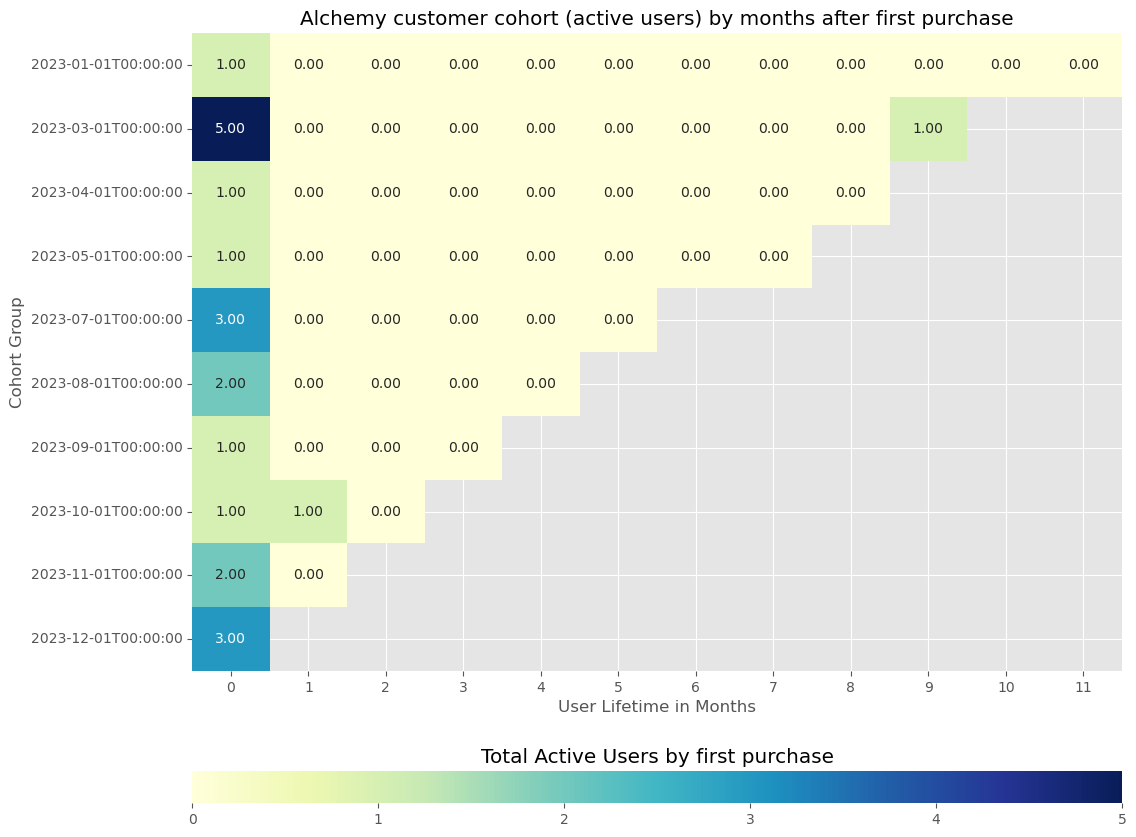

In [17]:
# customer cohort
pivot0 =prod7_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Alchemy customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- We can see that for all cohorts, there no activity beyond their initial purchase. February and June cohort doesn't even exist, as there is no active users even on the initial month.

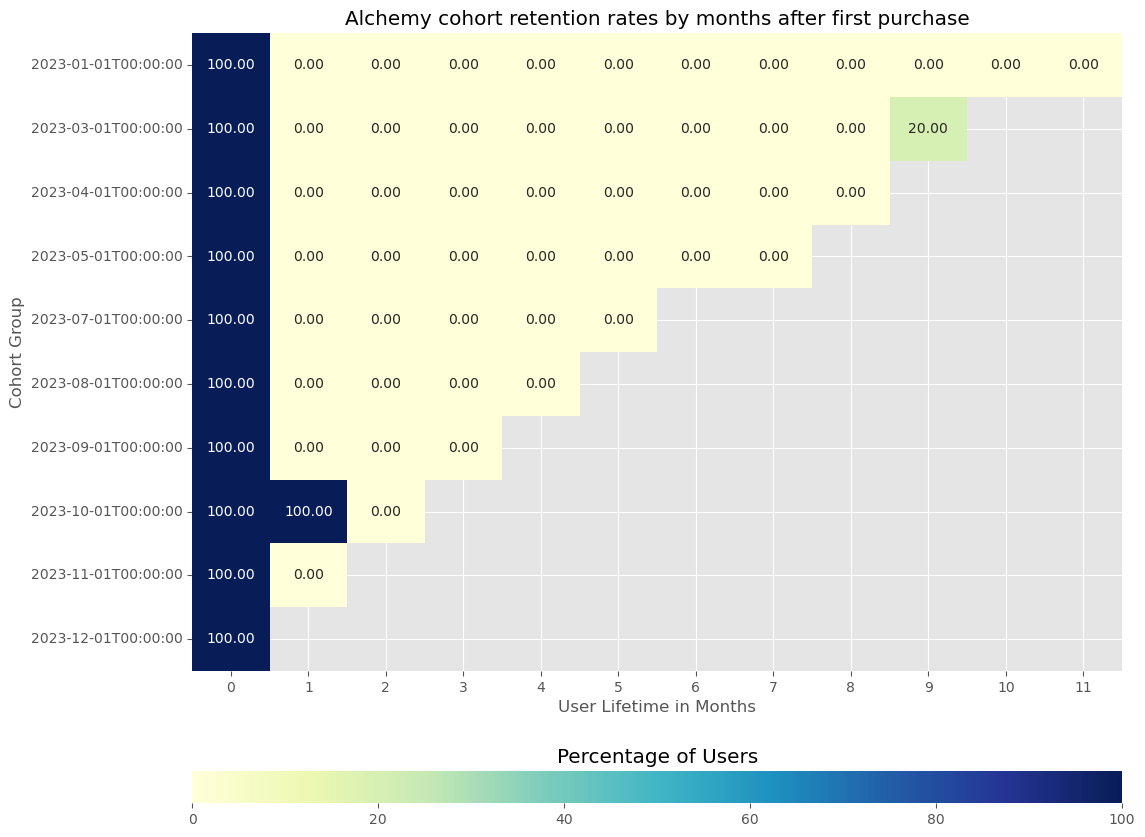

In [18]:
# customer retention
pivot1 =prod7_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Alchemy cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- As there is no activity beyond the initial purchase, retention rates for all cohorts is 0%. 

C:\Users\arizk\AppData\Local\Temp\ipykernel_8848\1385511696.py:2: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.relplot(data=prod7_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))


Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

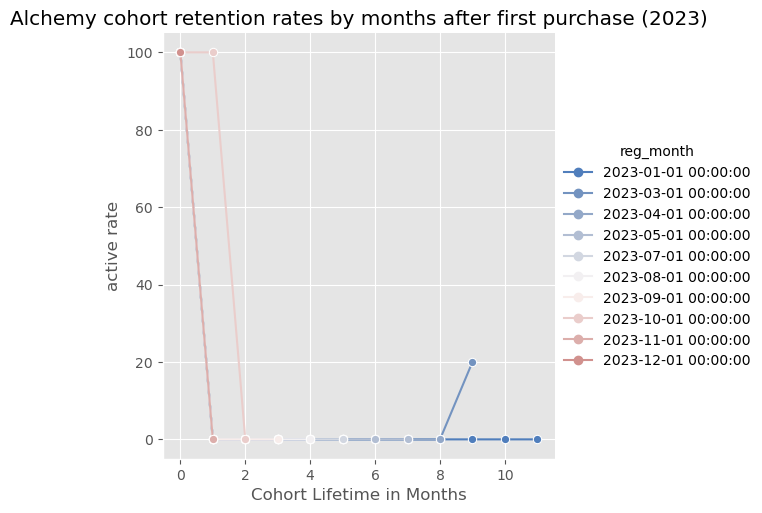

In [20]:
# retention rate lineplots
sns.relplot(data=prod7_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Alchemy cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [16]:
prod7_cohort2 =prod7_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

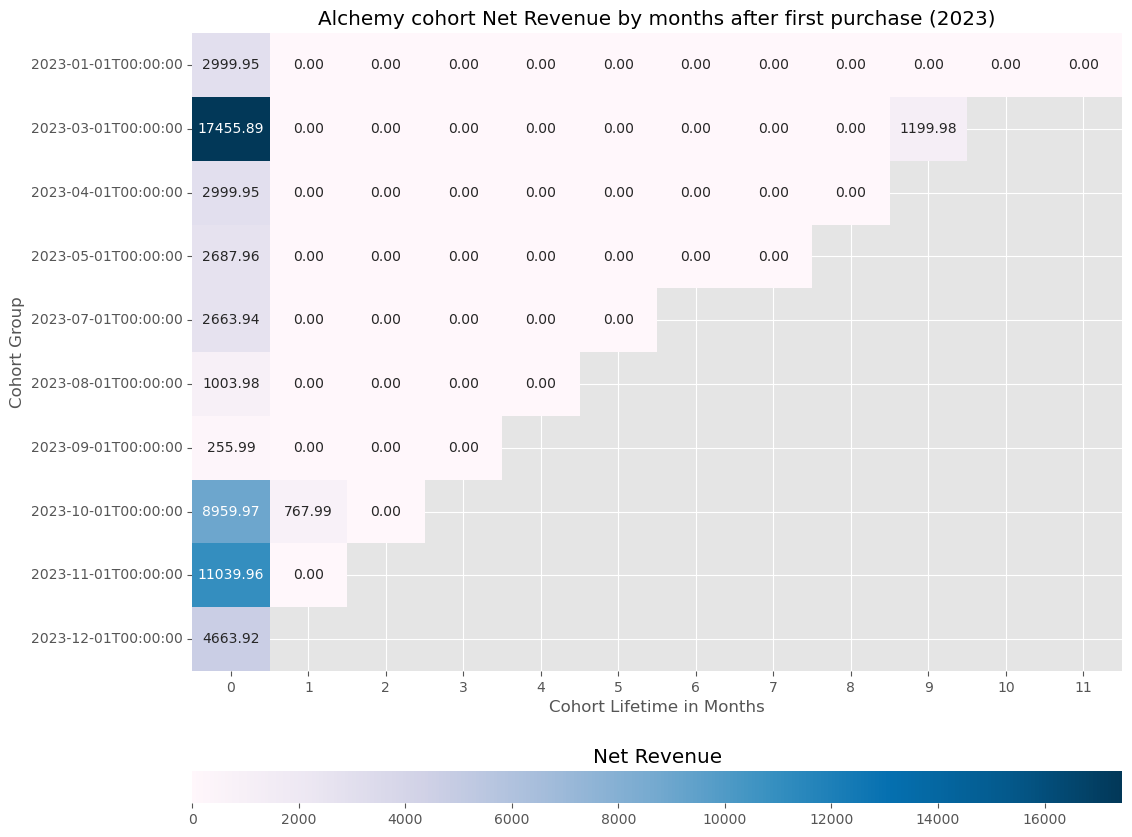

In [22]:
# Net Revenue by Cohort
pivot2 =prod7_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Alchemy cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- With no subsequent purchases, each cohort's net revenue value depends on the purchase in initial month.
- March cohort, who has 5 users in the initial month, has the highest initial purchase, at 17455.89
- November cohort, despite having only 2 users in the initial month, has the second highest initial purchase, at 11039.96.  

In [17]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod7_2023_user.loc[prod7_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod7_cohort2 = prod7_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod7_cohort2 ['net dollar retention'] = (prod7_cohort2['discounted_sales'] / prod7_cohort2['ds_max']) * 100

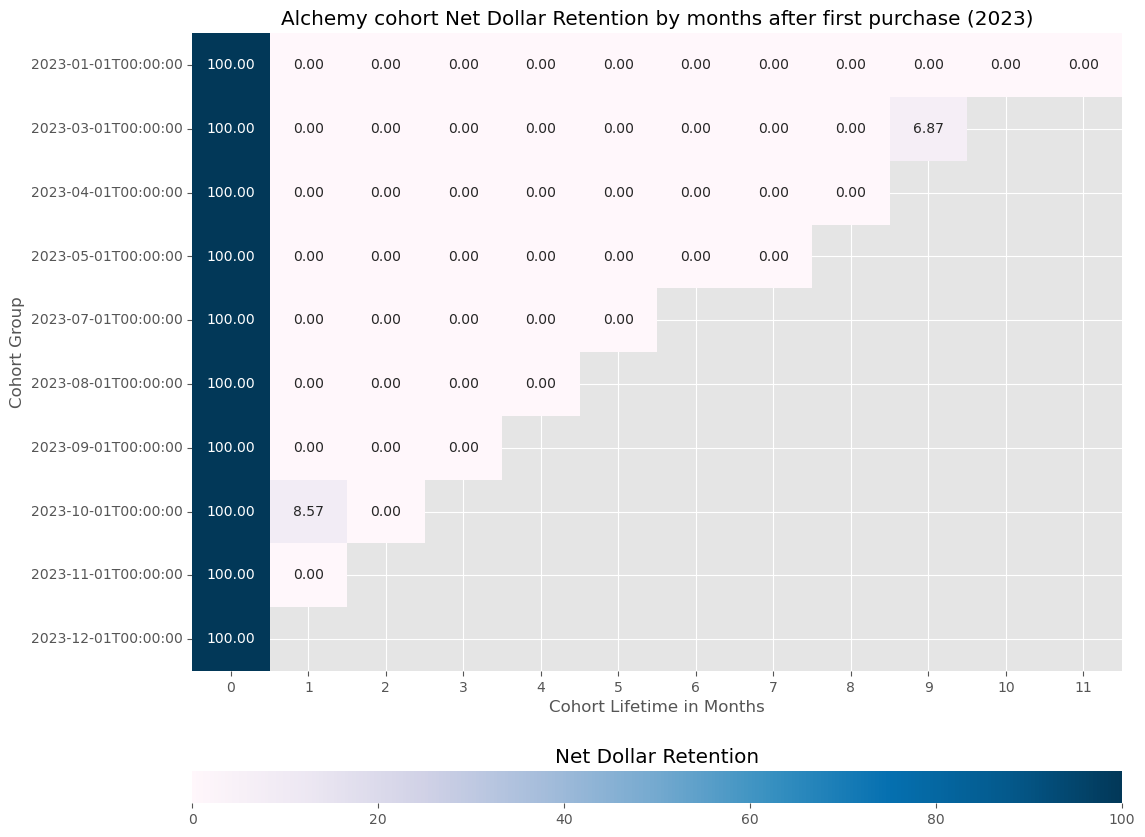

In [24]:
# Net Dollar/Revenue Retention
pivot3 =prod7_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Alchemy cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

- After its initial month's purchase, in all cohorts there is no subsequent purchases for Alchemy.  

In [18]:
prod7_cohort2 ['cumulative lifetime revenue'] = prod7_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

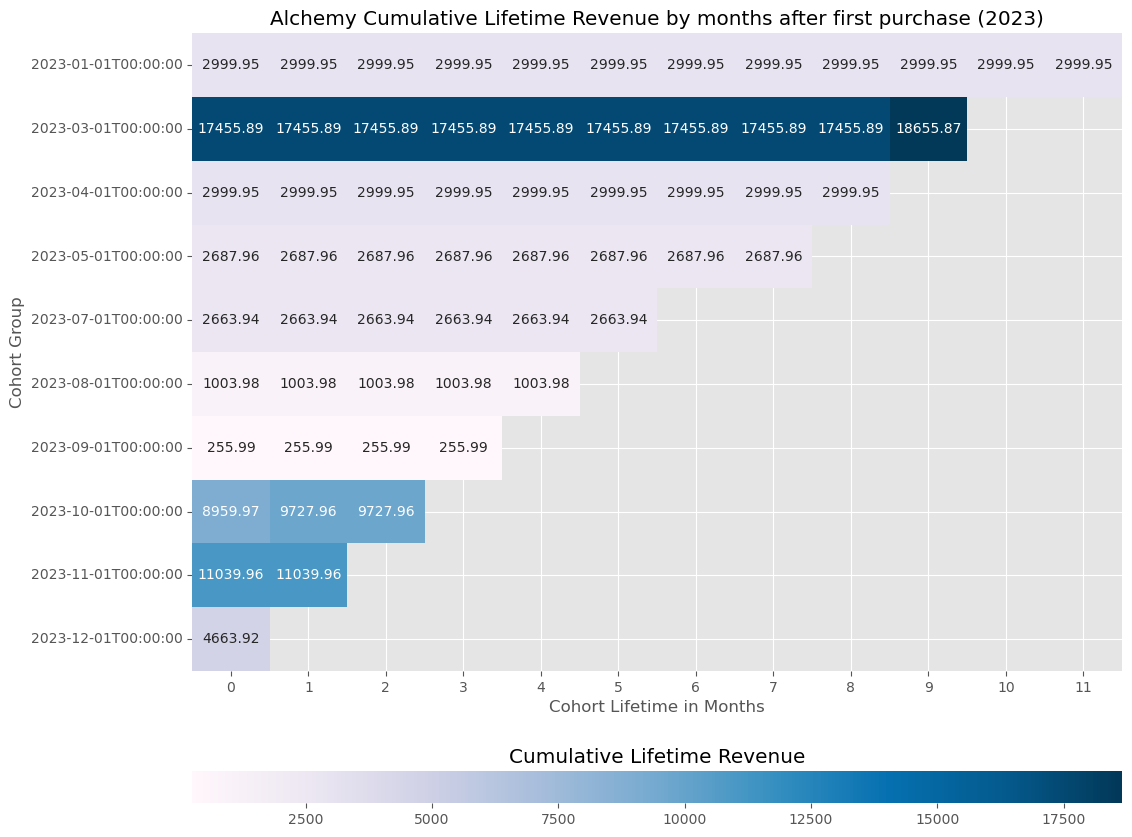

In [26]:
# cumulative lifetime revenue by cohort
pivot4 =prod7_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Alchemy Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

C:\Users\arizk\AppData\Local\Temp\ipykernel_9440\1975470008.py:2: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.relplot(data=prod7_cohort2, x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))


Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

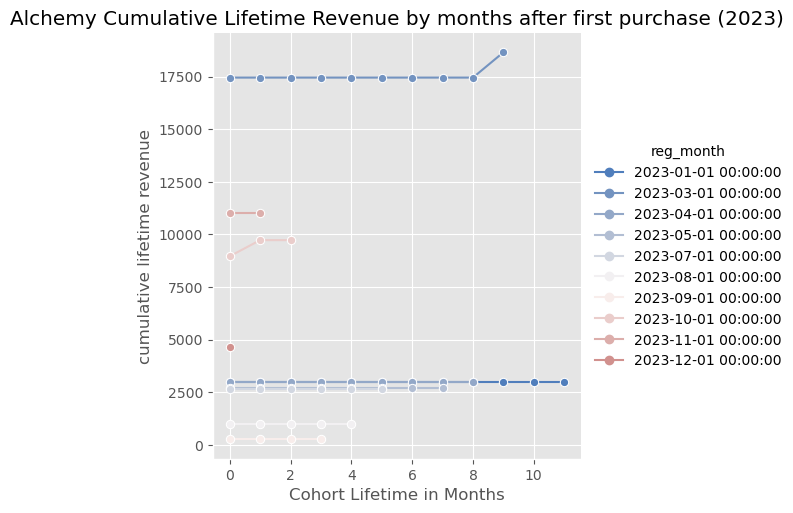

In [ ]:
#  cumulative lifetime revenue lineplots
sns.relplot(data=prod7_cohort2, x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Alchemy Cumulative Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- As there is little to no subsequent purchases for generally all cohorts, its cumulative revenue remains relatively stagnant, its value being determined largely only the initial purchase.

In [19]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod7_2023_user.loc[prod7_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod7_cohort2 = prod7_cohort2.merge(user_max,how='left',on=['reg_month'])
prod7_cohort2 ['customer lifetime revenue'] = (prod7_cohort2['cumulative lifetime revenue'] / prod7_cohort2['user_max'])

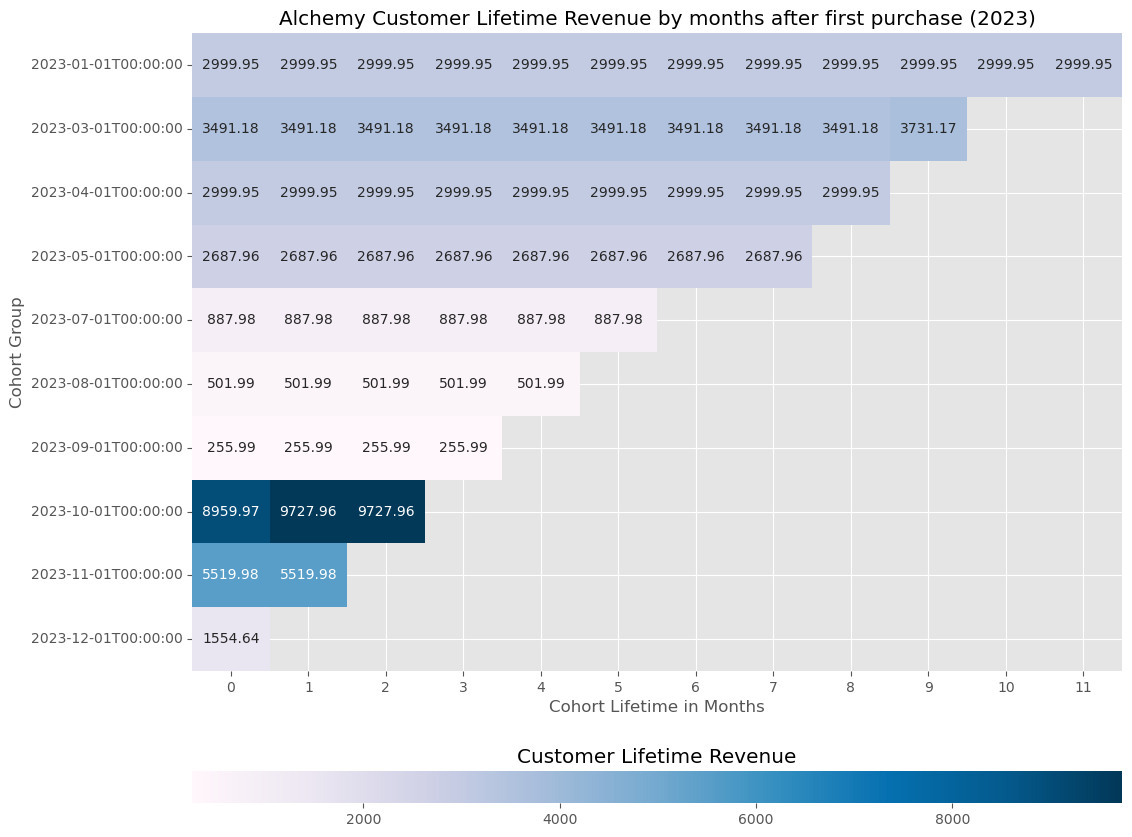

In [28]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod7_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Alchemy Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

C:\Users\arizk\AppData\Local\Temp\ipykernel_9440\1067390372.py:2: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.relplot(data=prod7_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))


Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

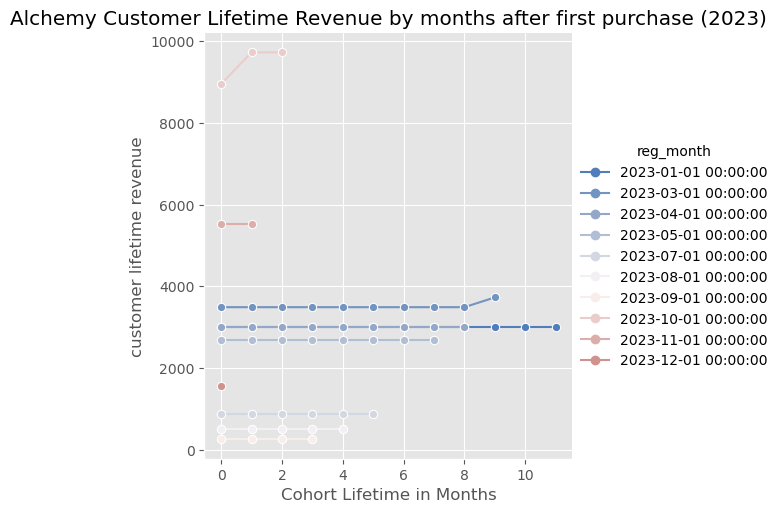

In [29]:
#  customer lifetime revenue lineplots
sns.relplot(data=prod7_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Alchemy Customer Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- As there is no subsequent purchases across all cohorts, per-user value throughout the year remains the same as its initial month. In other words,  generally each user only bought Alchemy once throughout the whole year.
- For Alchemy, it is interesting to see that cohorts from Q1 (January, February, March) and Q2 (April, May, July; July is technically Q3 but since June isn't present) are lumped together in terms of purchase.
- On a per customer basis, the highest can be observed in the October cohort. By December, each user in the cohort on average would pay close to 10k. From the previous chart, we know that in the cohort there is only 1 user. 

In [ ]:
# query for the high-paying October user, (look at discounted_sales for initial purchase)
prod7_2023.query('month == 10')

,Order ID,Order Date,Date Key,Customer ID,Customer,Segment,Industry,Region,Subregion,Country,City,Product,Sales,Quantity,Discount,net_profit,total_discount_in_dollars,selling_price,(net)_profit_before_discount,net_profit_per_unit_sold,profit_margin,discounted_sales,month,year,year_month,reg_date,Month
2623,EMEA-2023-127180,2023-10-23,20231023,1100,Trafigura Group,Enterprise,Finance,EMEA,UKIR,United Kingdom,London,Alchemy,11199.9680,4,0.2000,3919.9888,2239.9936,2799.9920,6159.9824,979.9972,35.0000,8959.9744,10,2023,2023-10,2023-10-23,2023-10-01


In [28]:
prod7_2023_user[prod7_2023_user['Customer ID'] == 1100]

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
83,2023-10-01,1100,Trafigura Group,2023-10-23,2023-10-01,4.0000,11199.9680,8959.9744,6159.9824,3919.9888,1.0000,1,1,1,NaN,1,1,0,0,2023-10,2023-10,0
100,2023-11-01,1100,Trafigura Group,2023-10-23,2023-10-01,2.0000,959.9840,767.9872,503.9916,311.9948,1.0000,1,0,1,1.0000,0,1,0,0,2023-11,2023-10,1
120,2023-12-01,1100,Trafigura Group,2023-10-23,2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1.0000,1,2,1,1,2023-12,2023-10,2


- We can see that the October user bought 4 units of Alchemy in October, each for a lofty price of ~2800 (before discounts).

In [21]:
# CLV - but with net profit
prod7_cohort2 ['cum_net_profit'] = prod7_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod7_cohort2 ['Customer Lifetime Value'] = (prod7_cohort2['cum_net_profit'] / prod7_cohort2['user_max'])

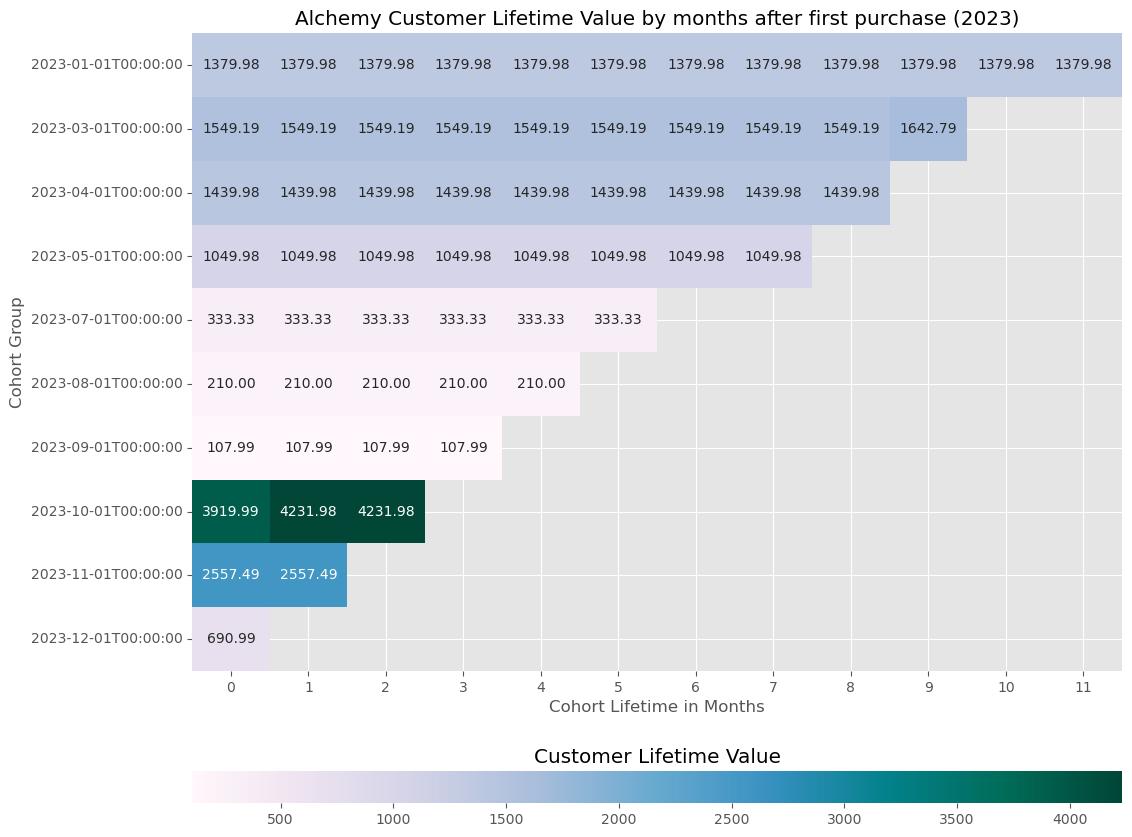

In [23]:
# Customer Lifetime Value, by cohort
pivot6 =prod7_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Alchemy Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

-  It can be observed that there are no negative profit values per user in the cohorts, meaning that Alchemy is contributing profit.
- October cohort provide the highest profits from all the cohorts per user (~4.2k made by the first month after initial purchase, with no purchase made in December). Based on the CLV, this cohort show the most promise. However, since this CLV value is made using net profit instead of gross profit, here Costumer Acquisition Cost (CAC) is assumed to be already accounted for. Usually, CLV values (calculated with gross profit) is measured against CAC to see the actual value of a customer. Since CAC data doesn't exist in this dataset and is taked as granted, CLV of October cohort should not be taken at face value. Just for estimation purposes.

**Key findings:**
1. Using a monthly analysis of 2023, for all cohorts there is no activity beyond their initial purchase.  February and June cohort is missing/have no purchase at all. User retention rates is 0%, NDR is 0%, for all cohorts.
2. March cohort, which had 5 users in the initial month, contributes the highest in initial revenue, at 17455.89.
3. On a per customer basis, users in the October cohort contributes the highest revenue and profit (~8-10k in monthly revenue; ~4-4.2k in profit). However, there is only 1 user.  
4. No negative profit values can be observed for Alchemy.

### Profitability

In [25]:
# calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives= prod7_2023[prod7_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives= prod7_2023[prod7_2023['(net)_profit_before_discount'] > 0]
# negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

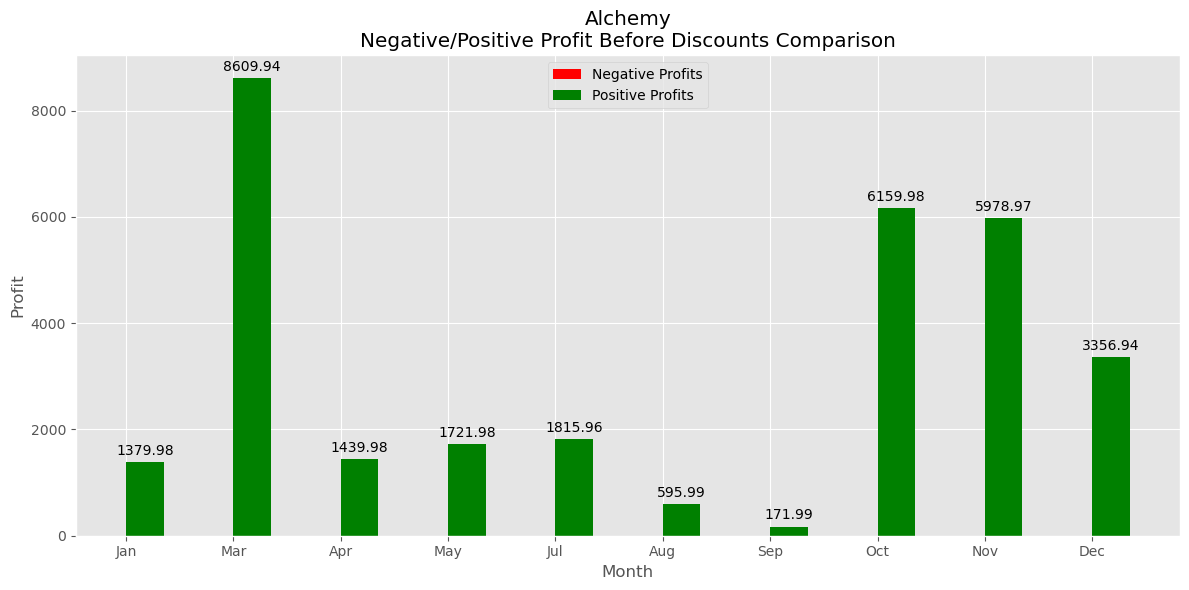

In [28]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Alchemy\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan','Mar','Apr','May','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper center')

# Show plot
plt.tight_layout()
plt.show()

>"Before Discounts" reflects a theoretical scenario assuming sales were made without discounts. This represents a potential profit scenario assuming all sales happened at full price.

**Key findings:**
1. Pre-discounts, Alchemy consistently had positive profits, without any negative profits. However, we know from previous cohort analysis that it had very little users, purchases are made by cohorts only in the initial month (no subsequent purchases), and that there is no purchase at all in February and June. Profits tend to spike in certain months, with no apparent seasonality. To see meaningful pattern in might be necessary to do an annual analysis along with monthly analysis.
2. March, October, and November stand out with higher profits. March has the highest user (5) and highest positive profit (8,609.9441), which indicate that user engagement is a crucial driver of profits. October shows a high positive profit (6,159.9824) despite having only 1 active user. November records a notable positive profit (5,978.9685) with 3 active users.
3. September saw the lowest in positive profits, at 171.9914.
4. Based on the profitability trends and user engagement patterns previously examined, Alchemy has similar characteristics to a SaaS product that cater to specialized or high-value needs (niche).

### Discounting EDA

In [21]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod7_2023[(prod7_2023['net_profit'] < 0)]
post_discount_positives = prod7_2023[(prod7_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

In [22]:
plus_minus2.set_index('month')

,negative profits after discount,positive profits after discount
month,,
1,NaN,1379.9770
3,NaN,7745.9617
4,NaN,1439.9760
5,NaN,1049.9850
7,NaN,999.9795
8,NaN,419.9910
9,NaN,107.9946
10,NaN,3919.9888
11,NaN,5426.9789


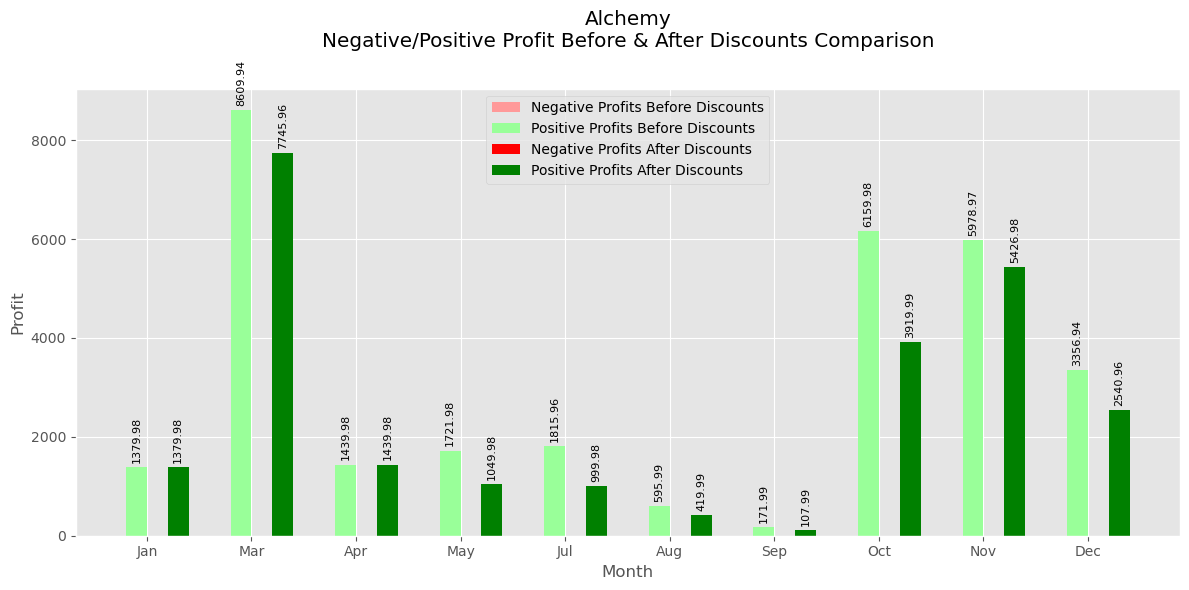

In [32]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Alchemy\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Mar','Apr','May','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper center')

# Show plot
plt.tight_layout()
plt.show()

>"After Discounts" reflect actual profit accounting for discounts, showing real-world profit outcomes.

In [ ]:
# October overall profit
6159.9824 - 3919.9888

2239.9936

In [26]:
2239.9936/6159.9824

0.3636363636363636

- No negative profit after discounts, but discounts seem to have a noticeable impact on profitability, especially in October as potential positive profit was reduced from 6159.9824 to 3919.9888 with discounts. Despite a substantial reduction from its pre-discount figures (around 36%), this is still significant profit.
-  March, October, and November remain months with the highest profits after discounts. March have the largest profit (7745.9617), followed by November (5426.9789), and October (3,919.9888).  
- September still have the lowest profit after discounts, but nonetheless positive (107.99).

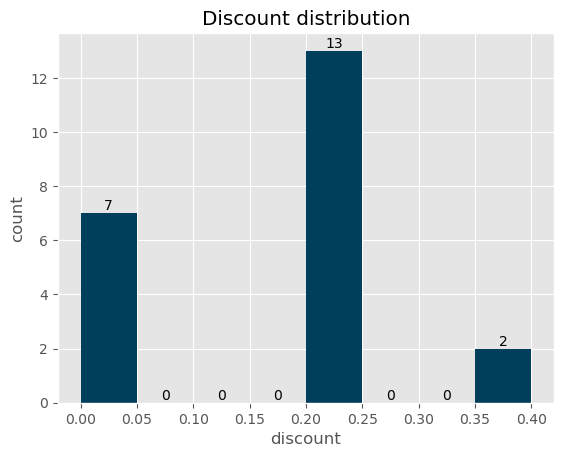

In [27]:
n, bins, patches = plt.hist(data=prod7_2023, x='Discount', bins=8, color='#003f5c')
plt.title('Discount distribution')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()


In [ ]:
# total orders
7 + 13 + 2

22

In [ ]:
# discounted orders
13 + 2

15

In [30]:
# discounted orders percentage
15/22

0.6818181818181818

In [31]:
# 20% discount percentage
13/22

0.5909090909090909

- we can see that majority of Alchemy orders are discounted orders (around 68%), with 13 orders being 20% discount orders (~59%), and 2 orders being 40% discount orders (~1%).

In [33]:
# Range of Discounts (March, May, July, October, November)
filtered_df = prod7_2023[prod7_2023['month'].isin([3, 5, 7, 10, 11])]

# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std      mean       min    median       75%       max  \
month Discount                                                              
3     0.0000        NaN 6719.9808 6719.9808 6719.9808 6719.9808 6719.9808   
      0.2000   246.1854  256.4952   59.9980  197.9962  394.4934  569.9905   
5     0.2000        NaN 1049.9850 1049.9850 1049.9850 1049.9850 1049.9850   
7     0.2000   530.3223  464.9915   89.9970  464.9915  652.4887  839.9860   
      0.4000        NaN   69.9965   69.9965   69.9965   69.9965   69.9965   
10    0.2000        NaN 3919.9888 3919.9888 3919.9888 3919.9888 3919.9888   
11    0.0000        NaN 5039.9856 5039.9856 5039.9856 5039.9856 5039.9856   
      0.2000        NaN  311.9948  311.9948  311.9948  311.9948  311.9948   
      0.4000        NaN   74.9985   74.9985   74.9985   74.9985   74.9985   

                count  
month Discount         
3     0.0000        1  
      0.2000        4  
5     0.2000        1  
7     0.2000        2  
      0.4000        1  
10    0.2000        1  
11    0.0000        1  
      0.2000        1  
      0.4000        1

- As there is only 1 orders within each discount range (with few exceptions), the standard deviation (std) is not applicable (NaN), and measures like median, 75th percentile, min, and max all equal the mean. Essentially, there is no variability to assess, which makes it difficult to infer the impact of discounts.
- March is an exception, as there are 4 orders within the 20% discount range. Within this range, minimum profit is 59.9980, and the maximum profit is 569.9905, showing a wide range of profit values, with some orders yielding significantly higher profits than others.
- Based on March, a wide range of profits suggests that the 0.2000 discount might be attracting a diverse range of spending behaviors. This discount level could be strategically beneficial in catering to both low and high spenders, balancing overall profitability.

**Key findings:**
1. Majority of Alchemy orders are discounted, with 68% being discounted orders, primarily at 20% discount. This suggests that discounts play a critical role in driving sales. Customers might be highly responsive to discounts, indicating a price-sensitive user base. However, we also know that retention is mostly non-existant for Alchemy. Failure to retain customers suggests that the perceived value of the product at a discounted price is higher than its actual value when experienced.
2. No negative profits after discounts, but discounts significantly reduce profitability, especially in October (profit decreased by around 36%).
3. March, October, and November have the highest profits after discounts, with March leading (7745.9617), followed by November (5426.9789), and October (3919.9888).
4. September has the lowest profit after discounts but remains positive (107.99).
5. Standard deviation is not applicable for months with only one order, making it difficult to assess variability or impact of discounts.

### Segmentation EDA

In [7]:
# make a segment df, from the product df
prod7_2023_segment = prod7_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod7_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod7_2023_percents = segment_account.merge(prod7_2023_segment,how='left',on=['Segment'])
prod7_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,7,27,23079.7700,19303.8020,12027.8856,8251.9176
1,SMB,9,24,29919.7980,29055.8244,14280.9066,13416.9330
2,Strategic,6,22,9899.8200,8339.8496,4922.9100,3362.9396


In [8]:
# calculate percentage of segment's business share by category
prod7_2023_percents['% Account']= prod7_2023_percents['account'] / prod7_2023_percents['account'].sum() *100
prod7_2023_percents['% Quantity']= prod7_2023_percents['Quantity'] / prod7_2023_percents['Quantity'].sum() *100
prod7_2023_percents['% Sales']= prod7_2023_percents['Sales'] / prod7_2023_percents['Sales'].sum() *100
prod7_2023_percents['% Net Revenue']= prod7_2023_percents['discounted_sales'] / prod7_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod7_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod7_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

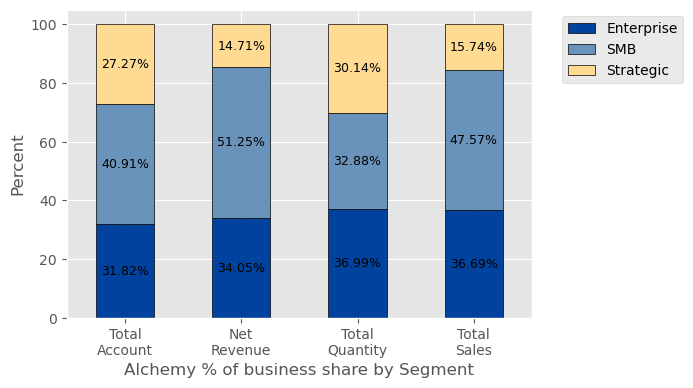

In [9]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod7_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Alchemy % of business share by Segment')
plt.ylabel('Percent')

-  In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "Alchemy" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for Alchemy based on the last year of company activity.
- We can see that despite having 40.91% of the total accounts, SMBs contribute the highest net revenue (51.25%) and total sales (47.57%).

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

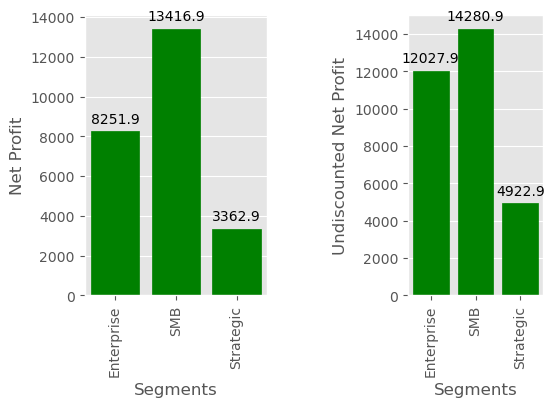

In [36]:
# Alchemy net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod7_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod7_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Net profit for SMBs is significantly higher (13,416.9) compared to Enterprise (8,251.9) and Strategic (3,362.9).
- Undiscounted net profit is also highest for SMBs (14,280.9), indicating strong financial performance without discounts.
- SMB segment delivers disproportionately high financial value compared to its share of total accounts.
- While the Enterprise and Strategic segment are underperforming compared to SMB, it would be wiser to dig further before ruling them out.

### Further Inquiries on Segments -----------

In [37]:
# Copy-pasted code for Industry queries within segment
# Industries using Alchemy within the SMB Segment
prod7_2023_industry_SMB = prod7_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod7_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod7_2023_percents_SMB = SMB_account.merge(prod7_2023_industry_SMB,how='left',on=['Industry'])
prod7_2023_percents_SMB['% Account']= prod7_2023_percents_SMB['account'] / prod7_2023_percents_SMB['account'].sum() *100
prod7_2023_percents_SMB['% Quantity']= prod7_2023_percents_SMB['Quantity'] / prod7_2023_percents_SMB['Quantity'].sum() *100
prod7_2023_percents_SMB['% Sales']= prod7_2023_percents_SMB['Sales'] / prod7_2023_percents_SMB['Sales'].sum() *100
prod7_2023_percents_SMB['% Net Revenue']= prod7_2023_percents_SMB['discounted_sales'] / prod7_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod7_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod7_SMB = percents_SMB.columns.tolist()
# Industries using Alchemy within the Strategic Segment
prod7_2023_industry_Strategic = prod7_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod7_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod7_2023_percents_Strategic = Strategic_account.merge(prod7_2023_industry_Strategic,how='left',on=['Industry'])
prod7_2023_percents_Strategic['% Account']= prod7_2023_percents_Strategic['account'] / prod7_2023_percents_Strategic['account'].sum() *100
prod7_2023_percents_Strategic['% Quantity']= prod7_2023_percents_Strategic['Quantity'] / prod7_2023_percents_Strategic['Quantity'].sum() *100
prod7_2023_percents_Strategic['% Sales']= prod7_2023_percents_Strategic['Sales'] / prod7_2023_percents_Strategic['Sales'].sum() *100
prod7_2023_percents_Strategic['% Net Revenue']= prod7_2023_percents_Strategic['discounted_sales'] / prod7_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod7_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod7_Strategic = percents_Strategic.columns.tolist()
# Industries using Alchemy within the Enterprise Segment
prod7_2023_industry_Enterprise = prod7_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod7_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod7_2023_percents_Enterprise = Enterprise_account.merge(prod7_2023_industry_Enterprise,how='left',on=['Industry'])
prod7_2023_percents_Enterprise['% Account']= prod7_2023_percents_Enterprise['account'] / prod7_2023_percents_Enterprise['account'].sum() *100
prod7_2023_percents_Enterprise['% Quantity']= prod7_2023_percents_Enterprise['Quantity'] / prod7_2023_percents_Enterprise['Quantity'].sum() *100
prod7_2023_percents_Enterprise['% Sales']= prod7_2023_percents_Enterprise['Sales'] / prod7_2023_percents_Enterprise['Sales'].sum() *100
prod7_2023_percents_Enterprise['% Net Revenue']= prod7_2023_percents_Enterprise['discounted_sales'] / prod7_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod7_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod7_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

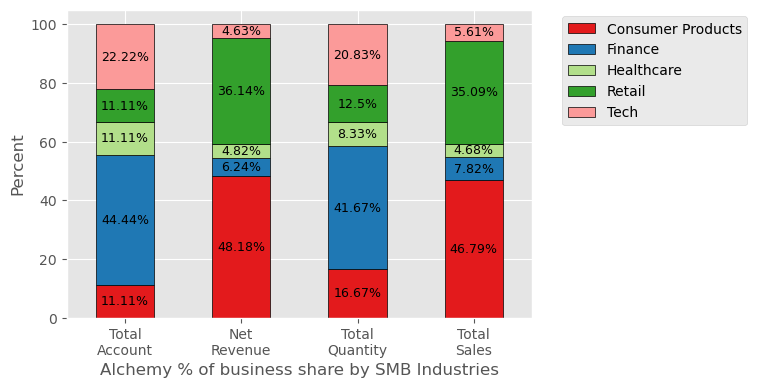

In [38]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod7_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Alchemy % of business share by SMB Industries')
plt.ylabel('Percent')

- Consumer Products and Retail industries within the SMB segment stand out with high percentages in both Net Revenue and Total Sales.
- Finance industry has a significant share of Total Accounts and Total Quantity but a much lower share in Net Revenue and Total Sales.
- Tech and Healthcare have relatively low contributions across all categories, especially in Net Revenue and Total Sales.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Consumer Products'),
  Text(1, 0, 'Finance'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Retail'),
  Text(4, 0, 'Tech')])

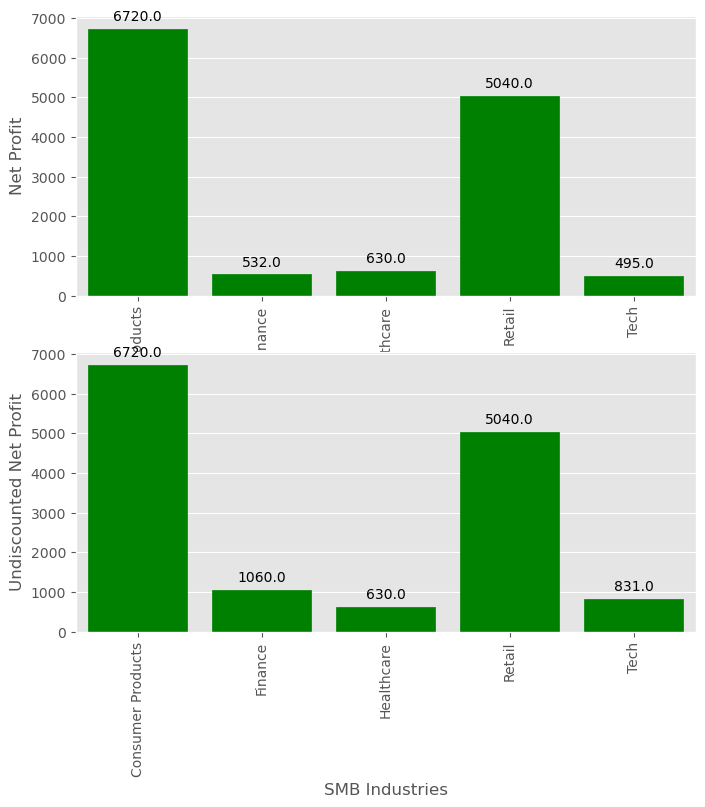

In [39]:
# Alchemy net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod7_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod7_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Consumer Products and Retail industries have the highest net profits and undiscounted net profits within the SMB segment.
- Finance, Healthcare, and Tech industries have relatively lower net profits, indicating they are less financially impactful compared to Consumer Products and Retail.

In the SMB segment, Consumer Products and Retail are the standout performers, driving substantial financial value. Consumer Products contribute 48.18% of Net Revenue, 46.79% of Total Sales, and a significant Net Profit of 6720.0. Retail follows closely with 36.14% of Net Revenue, 35.09% of Total Sales, and a substantial Net Profit of 5040.0. These figures underscore their crucial role in driving revenue and profit within the SMB segment.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

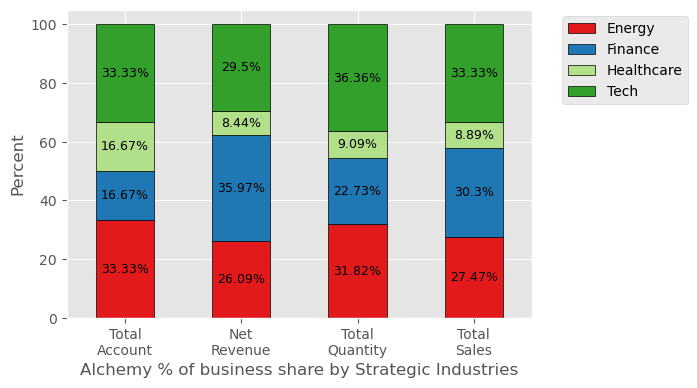

In [40]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod7_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Alchemy % of business share by Strategic Industries')
plt.ylabel('Percent')

- Finance and Tech industries have high percentages in Net Revenue and Total Sales.
- Energy also has significant contributions across Total Account, Net Revenue, and Total Sales.
- Healthcare has relatively lower contributions in all categories.

([0, 1, 2, 3],
 [Text(0, 0, 'Energy'),
  Text(1, 0, 'Finance'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Tech')])

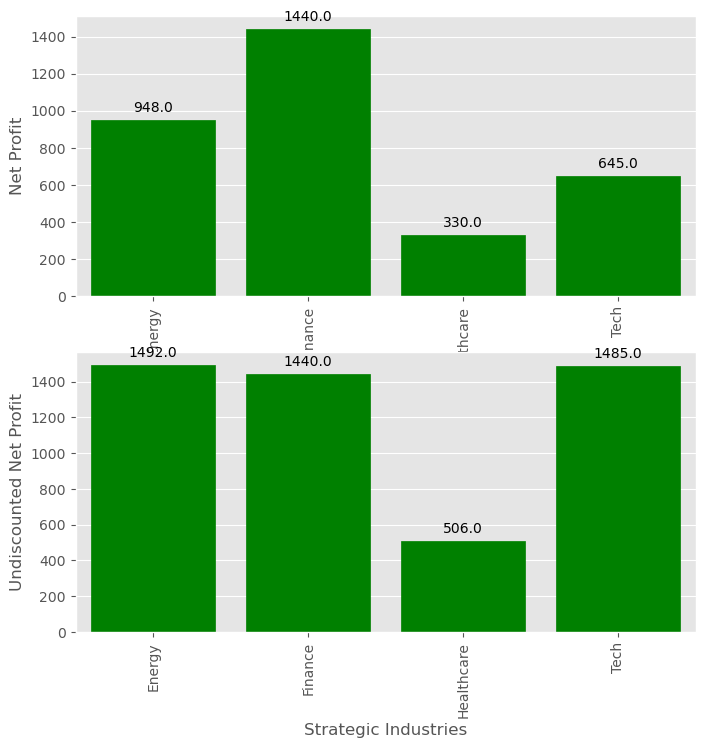

In [41]:
# Alchemy net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod7_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod7_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance and Energy industries have the highest net profits within the Strategic segment, with Finance at 1440.0 and Energy at 948.0.
- Tech also has a significant net profit of 645.0, while Healthcare has the lowest net profit of 330.0.
- Undiscounted net profit remains high for Finance (1440.0), Energy (1492.0), and Tech (1485.0).

In the Strategic segment, Finance and Energy lead in financial value. Finance achieves a Net Profit of 1440 and an Undiscounted Net Profit of 1440, while Energy follows with a Net Profit of 948 and an Undiscounted Net Profit of 1492. Finance also contributes 35.97% to Net Revenue and 30.3% to Total Sales, and Energy adds 26.09% to Net Revenue and 27.47% to Total Sales. In contrast, Tech and Healthcare have lower contributions, with Net Profits of 645 and 330, respectively.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

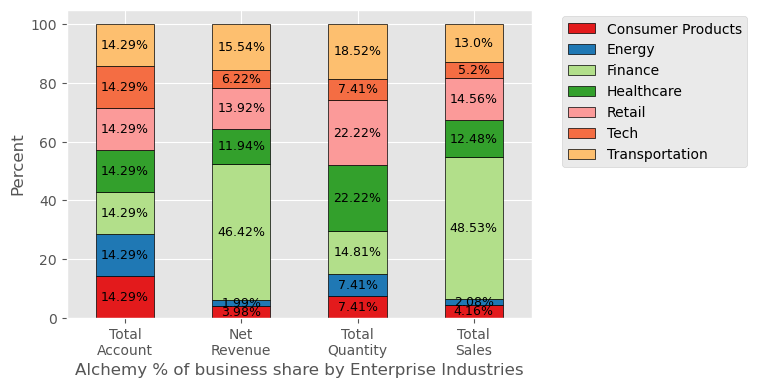

In [42]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod7_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Alchemy % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Retail stands out with the highest percentages in Net Revenue (46.42%) and Total Sales (48.53%).
- Consumer Products and Finance also have significant contributions across Net Revenue, Total Sales, and Total Quantity.
- Energy, Healthcare, Tech, and Transportation have lower contributions in most categories.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Consumer Products'),
  Text(1, 0, 'Energy'),
  Text(2, 0, 'Finance'),
  Text(3, 0, 'Healthcare'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'Tech'),
  Text(6, 0, 'Transportation')])

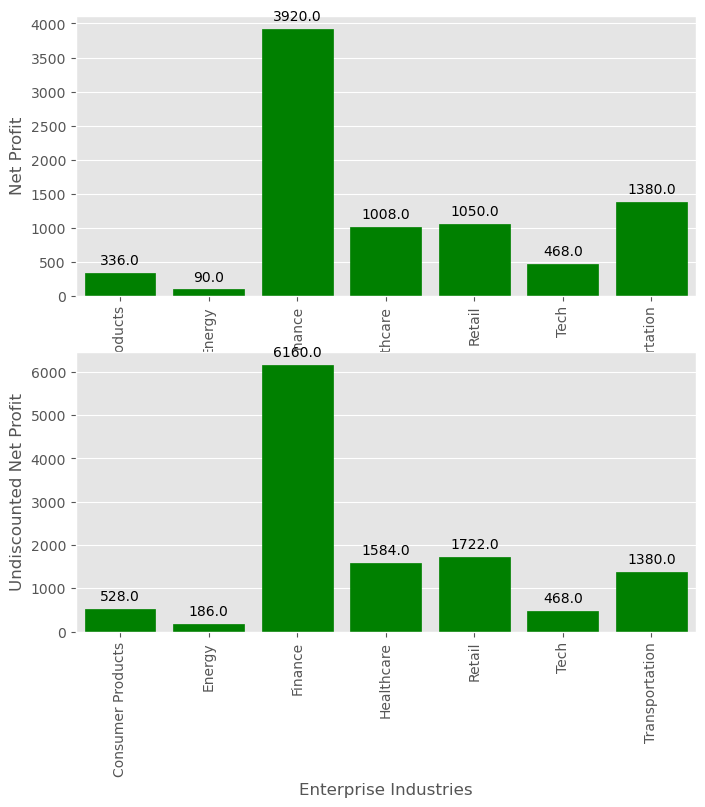

In [43]:
# Alchemy net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod7_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod7_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance has the highest Net Profit (3920.0) and Undiscounted Net Profit (6160.0), making it a significant contributor.
- Retail and Transportation also show strong results with Net Profits of 1050.0 and 1380.0, respectively.
- Healthcare follows closely with a Net Profit of 1008.0.
- Energy has the lowest Net Profit (90.0) but has a higher Undiscounted Net Profit (186.0).

In the Enterprise segment, Finance, Retail, and Transportation are the top performers, driving the highest financial value. Finance leads with a Net Profit of 3920 and an Undiscounted Net Profit of 6160, showcasing its significant impact. Retail follows with a Net Profit of 1050 and an Undiscounted Net Profit of 1722. Transportation also plays a key role, achieving a Net Profit and Undiscounted Net Profit of 1380. Retail stands out in revenue contributions with 46.42% of Net Revenue and 48.53% of Total Sales, while Finance contributes 13.92% to Net Revenue and 14.56% to Total Sales.

**Key findings:**
1. SMBs are the top performers, driving 51.25% of net revenue and 47.57% of sales, with a net profit of 13,416.93, even higher at 14,280.91 before discounts. They are financially efficient and impactful. Despite SMBs' lead, Enterprise (34.05% net revenue, 36.69% sales, 8,251.92 net profit) and Strategic segments (14.71% net revenue, 15.74% sales, 3,362.94 net profit) also contribute significantly. Abandoning them could mean lost opportunities. A balanced strategy focusing on SMBs while improving Enterprise and Strategic segments is the best approach. 

### Regional EDA

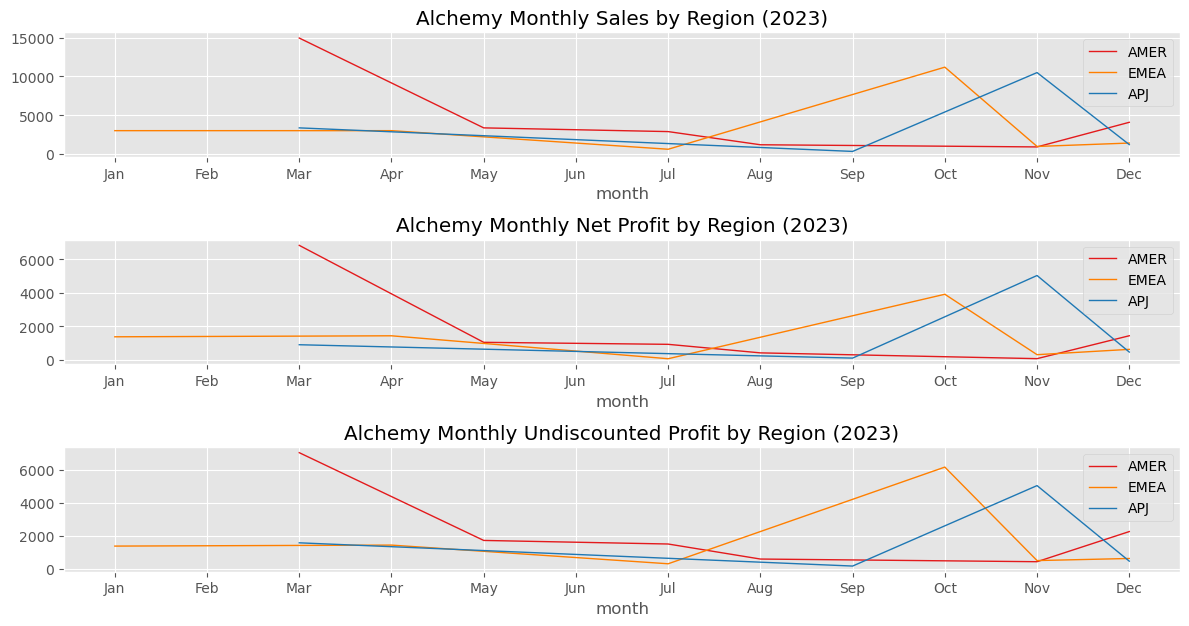

In [8]:
# Alchemy Monthly Income EDA by Region (2023)
prod7_region_month = prod7_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod7_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod7_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod7_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Alchemy Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod7_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod7_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod7_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Alchemy Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod7_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod7_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod7_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Alchemy Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance
Alchemy shows peaks in performance during March, October, and November, driven by regional performance. However, several months show little to no activity.
- AMER region shows significant variability in its monthly performance. Strong peaks in March and December are noteworthy, driven by high sales and net profit. However, there are six months with no activity, which indicates gaps in engagement.
- EMEA region shows significant variability in its monthly performance. Strong sales and net profits in October are noteworthy, however, there are six months with no activity.
- APJ region demonstrates a significant peak in November, which compensates for 8 other months with no activity.

Performance Highlights
March in the AMER region clearly stands out as the top performer in all categories
- Highest Sales: $14,959.93 (AMER region in March)
- Highest Net Profit: $6,839.98 (AMER region in March)
- Highest Undiscounted Profit: $7,031.97 (AMER region in March)

In [9]:
prod7_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,3,8,14959.9280,14767.9344,7031.9704,6839.9768
1,AMER,5,6,3359.9520,2687.9616,1721.9754,1049.9850
2,AMER,7,7,2879.9440,2303.9552,1505.9718,929.9830
3,AMER,8,3,1179.9740,1003.9772,595.9878,419.9910
4,AMER,11,3,899.9820,539.9892,434.9913,74.9985
5,AMER,12,9,4079.9280,3263.9424,2258.9601,1442.9745
6,APJ,3,7,3359.9440,2687.9552,1577.9737,905.9849
7,APJ,9,2,319.9840,255.9872,171.9914,107.9946
8,APJ,11,3,10499.9700,10499.9700,5039.9856,5039.9856
9,APJ,12,2,1199.9800,1199.9800,467.9922,467.9922


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

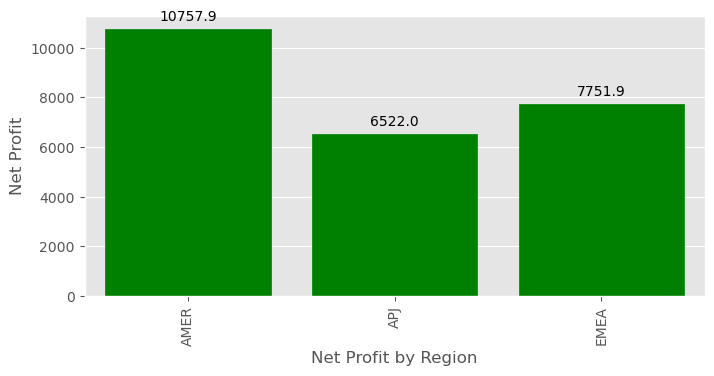

In [10]:
prod7_region = prod7_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod7_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [11]:
prod7_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,36,27359.7080,24567.7600,13549.8568,10757.9088
1,APJ,14,15379.8780,14643.8924,7257.9429,6521.9573
2,EMEA,23,20159.8020,17487.8236,10423.9025,7751.9241


In [12]:
grouped = prod7_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [13]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

In [14]:
pd.set_option('display.max_rows', None)
metrics_sorted

,Region,Segment,Industry,total_sales,avg_sales_per_order,total_profit,total_profit before discounts,avg_discount,profit_margin
0,AMER,Enterprise,Energy,479.9840,479.9840,89.9970,185.9938,0.2000,18.7500
1,AMER,Enterprise,Healthcare,2879.9520,2879.9520,1007.9832,1583.9736,0.2000,35.0000
2,AMER,Enterprise,Retail,3359.9520,3359.9520,1049.9850,1721.9754,0.2000,31.2500
3,AMER,SMB,Consumer Products,13999.9600,13999.9600,6719.9808,6719.9808,0.0000,48.0000
4,AMER,SMB,Finance,779.9740,389.9870,149.9950,245.9918,0.1000,19.2308
5,AMER,SMB,Tech,1679.9600,839.9800,494.9893,830.9813,0.2000,29.4644
6,AMER,Strategic,Energy,2399.9600,2399.9600,839.9860,1319.9780,0.2000,35.0000
7,AMER,Strategic,Healthcare,879.9840,879.9840,329.9940,505.9908,0.2000,37.5000
8,AMER,Strategic,Tech,899.9820,899.9820,74.9985,434.9913,0.4000,8.3333
9,APJ,Enterprise,Consumer Products,959.9840,959.9840,335.9944,527.9912,0.2000,35.0000


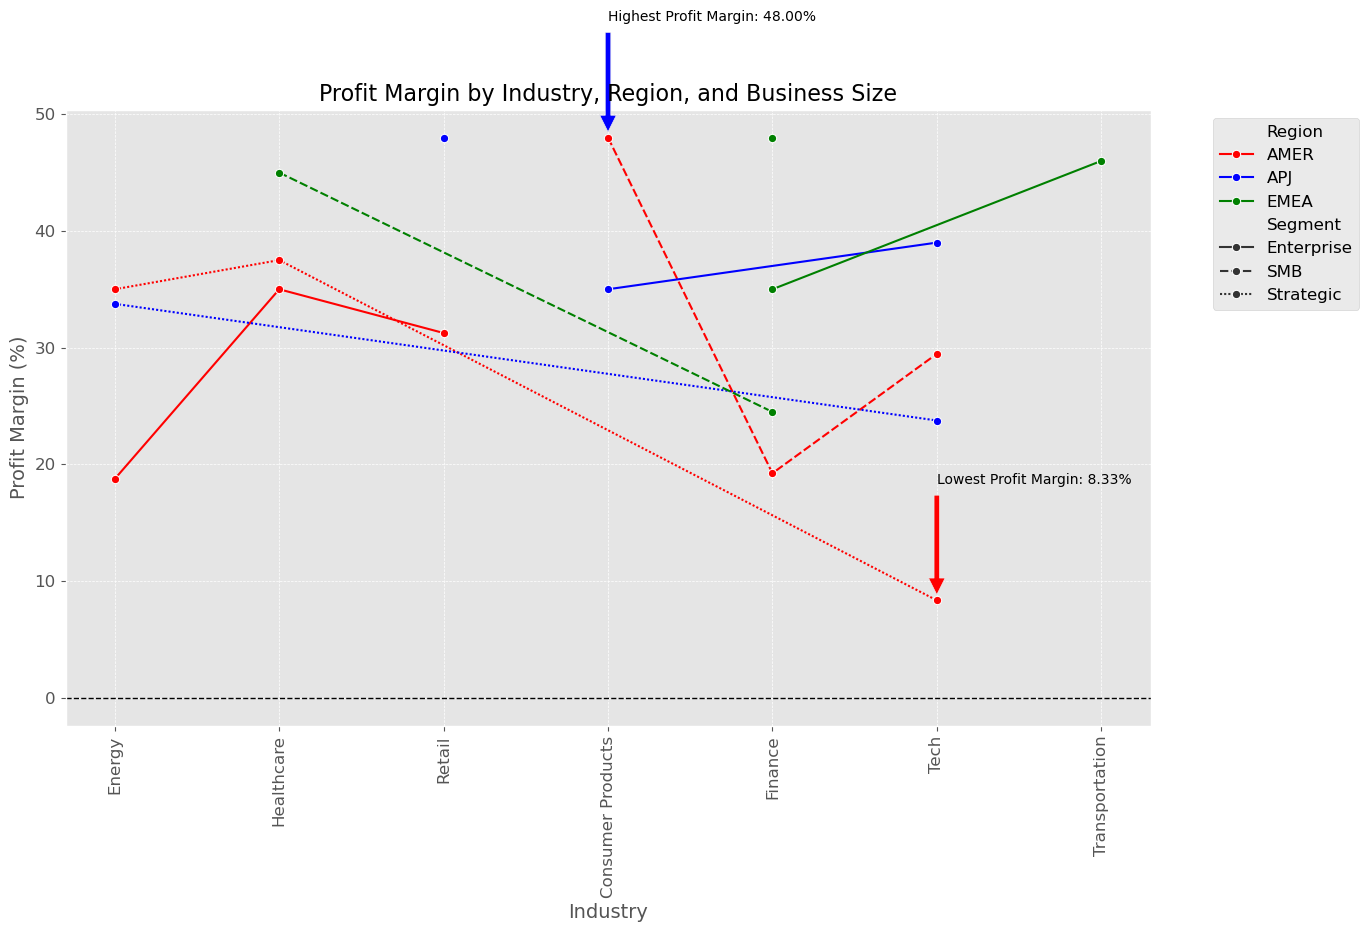

In [16]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit + 10), 
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [17]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])

In [20]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

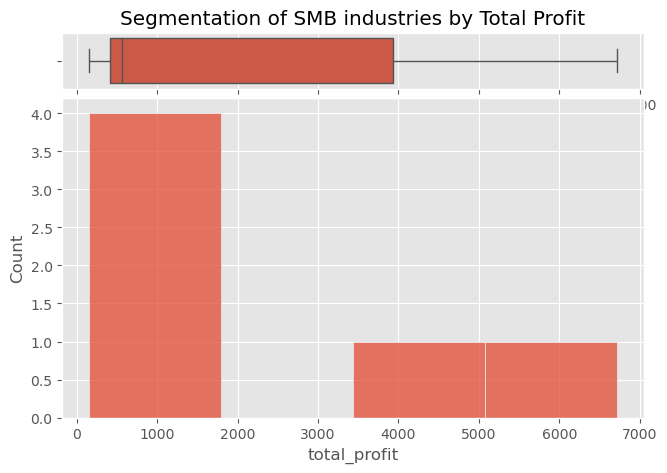

0.0000    149.9950
0.2500    410.2408
0.5000    562.4901
0.7500   3937.4869
1.0000   6719.9808
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 3937.49 in profit
- 3 (Good) : Contributes between 562.49 and 3937.49 in profit
- 2 (Marginal) : Contributes between 410.24 and 562.49 in profit
- 1 (Underperforming) : Contributes less than 410.24 in profit


In [19]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [21]:
smb_positive_profit_metrics['segmentation score'] = pd.qcut(
    smb_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,segmentation score
3,AMER,SMB,Consumer Products,6719.9808,4
11,APJ,SMB,Retail,5039.9856,4
17,EMEA,SMB,Healthcare,629.9910,3
5,AMER,SMB,Tech,494.9893,2
16,EMEA,SMB,Finance,381.9913,1
4,AMER,SMB,Finance,149.9950,1


In [22]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3, 2], "all maintain solid profitability.\nWhile not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Consumer Products in AMER, Retail in APJ are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Healthcare in EMEA, Tech in AMER all maintain solid profitability.
While not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Finance in EMEA, Finance in AMER are underperforming.
These SMB industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [23]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

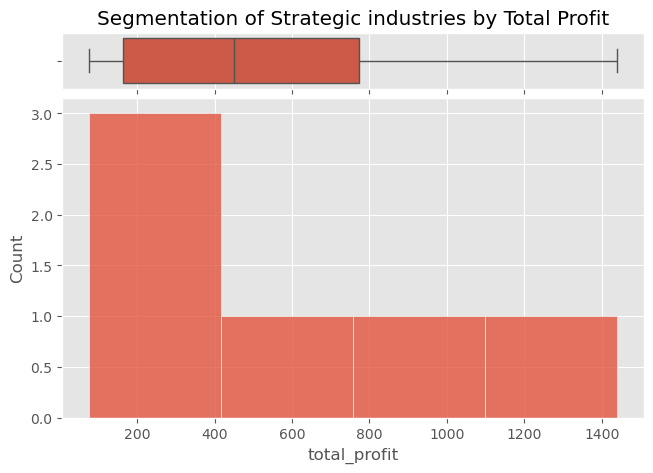

0.0000     74.9985
0.2500    163.4945
0.5000    449.9923
0.7500    772.4871
1.0000   1439.9760
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 772.49 in profit
- 3 (Good) : Contributes between 449.99 and 772.49 in profit
- 2 (Marginal) : Contributes between 163.49 and 449.99 in profit
- 1 (Underperforming) : Contributes less than 163.49 in profit


In [24]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [25]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,segmentation score
18,EMEA,Strategic,Finance,1439.9760,4
6,AMER,Strategic,Energy,839.9860,4
13,APJ,Strategic,Tech,569.9905,3
7,AMER,Strategic,Healthcare,329.9940,2
12,APJ,Strategic,Energy,107.9946,1
8,AMER,Strategic,Tech,74.9985,1


In [26]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in EMEA, Energy in AMER are the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Tech in APJ all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Healthcare in AMER, Energy in APJ, Tech in AMER are underperforming.
These Strategic industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [27]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

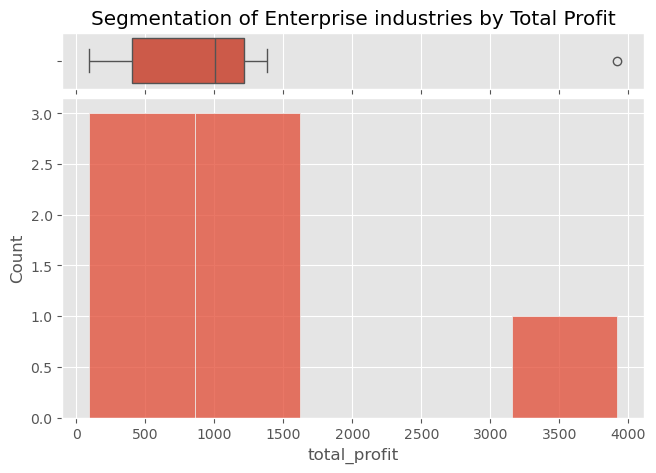

0.0000     89.9970
0.2500    401.9933
0.5000   1007.9832
0.7500   1214.9810
1.0000   3919.9888
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 1214.98 in profit
- 3 (Good) : Contributes between 1007.98 and 1214.98 in profit
- 2 (Marginal) : Contributes between 401.99 and 1007.98 in profit
- 1 (Underperforming) : Contributes less than 401.99 in profit


In [28]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [29]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,segmentation score
14,EMEA,Enterprise,Finance,3919.9888,4
15,EMEA,Enterprise,Transportation,1379.9770,4
2,AMER,Enterprise,Retail,1049.9850,3
1,AMER,Enterprise,Healthcare,1007.9832,2
10,APJ,Enterprise,Tech,467.9922,2
9,APJ,Enterprise,Consumer Products,335.9944,1
0,AMER,Enterprise,Energy,89.9970,1


In [30]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_positive_profit_metrics[enterprise_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Enterprise segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3,2], "all maintain solid profitability.\nWhile not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1], "are underperforming.\nThese Enterprise industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in EMEA, Transportation in EMEA are the highest performing industries in the Enterprise segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Retail in AMER, Healthcare in AMER, Tech in APJ all maintain solid profitability.
While not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Consumer Products in APJ, Energy in AMER are underperforming.
These Enterprise industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



**Key findings:**
1. AMER region shows significant variability in its monthly performance. Strong peaks in March and December are noteworthy, driven by high sales and net profit. However, there are six months with no activity, which indicates gaps in engagement. It is the top-performing region with the highest sales, discounted sales, and net profit because of its activities in March.
2. EMEA region shows significant variability in its monthly performance. Strong sales and net profits in October are noteworthy, however, there are six months with no activity.
3. APJ region demonstrates a significant peak in November, which compensates for 8 other months with no activity.
4. In the SMB segment, Consumer Products in AMER and Retail in APJ are the highest-performing industries. These industries are vital for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations.
5. For the Strategic segment, Finance in EMEA and Energy in AMER are top-performing. In the Enterprise segment, Finance and Transportation in EMEA stand out.
